In [8]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", 'Data')

# Drop unnecessary columns
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

In [2]:
# Gaussian naive bayes 
def prior(target, label, df):
    return float(len(df[df[target] == label]) / len(df))

def likelihood(feature, value, target, label, df):
    mean = df[df[target] == label][feature].mean()
    var = df[df[target] == label][feature].var()
    exponent = math.exp(-(pow(value - mean, 2) / (2 * var)))
    return (1 / (math.sqrt(2 * math.pi * var))) * exponent

In [3]:
def gaussian_naive_bayes_predict(features, feature_values, target, df):
    like_1 = 1
    like_0 = 1
    for i, f in enumerate(feature_values):
        like_1 *= likelihood(features[i], float(f), target, 1, df)
        like_0 *= likelihood(features[i], float(f), target, 0, df)

    prob_1 = like_1 * prior(target, 1, df)
    prob_0 = like_0 * prior(target, 0, df)

    if prob_1 > prob_0:
        return 1
    else:
        return 0

In [5]:
def plot_bell_curve(feature_name, df):
    mean = df[feature_name].mean()
    var = df[feature_name].var()
    x = df[feature_name].sort_values().values
    y = 1/(np.sqrt(2*np.pi*var)) * np.exp(-(x-mean)**2/(2*var))
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='Bell Curve', color='blue')
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.title('Bell Curve for ' + feature_name)
    plt.legend()
    plt.show()

In [6]:
# Test the Gaussian Naive Bayes prediction
features = ['Age', 'Income', 'Education']
feature_values = []
print("Enter values to predict for..")
for f in features:
    print(f, ": ")
    feature_values.append(input())

prediction = gaussian_naive_bayes_predict(features, feature_values, 'Personal Loan', df)
if prediction == 1:
    print("Predicted: Potential Customer!")
else:
    print("Predicted: Not likely a potential customer..")

Enter values to predict for..
Age : 


 23


Income : 


 450000


Education : 


 2


Predicted: Not likely a potential customer..


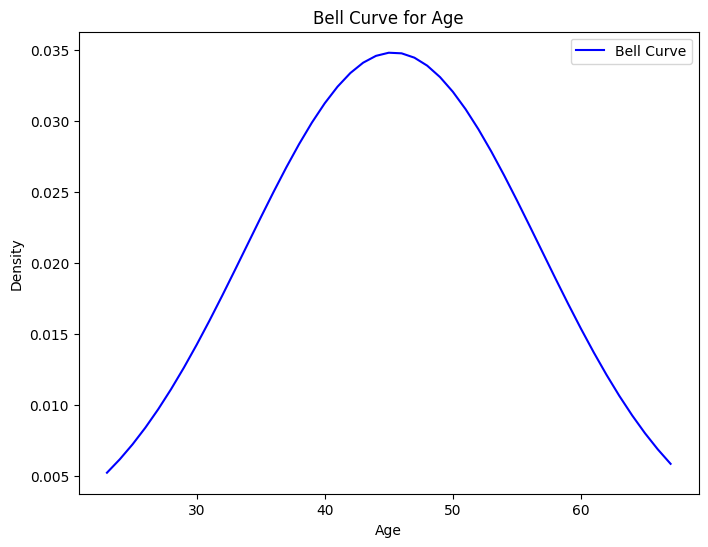

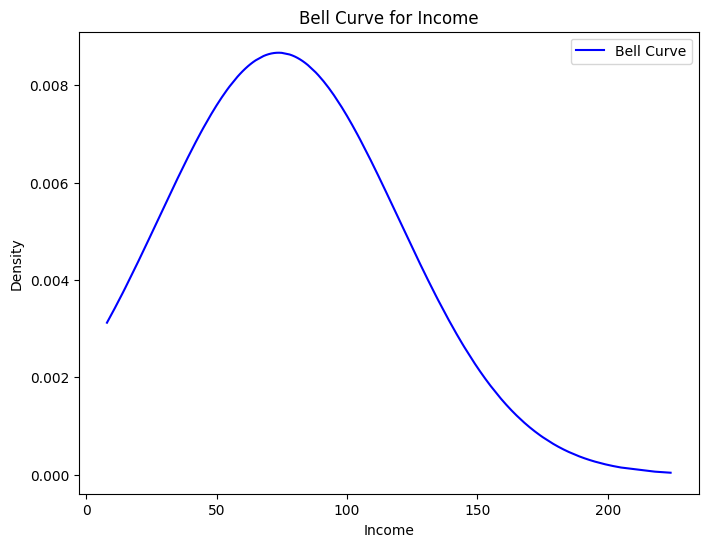

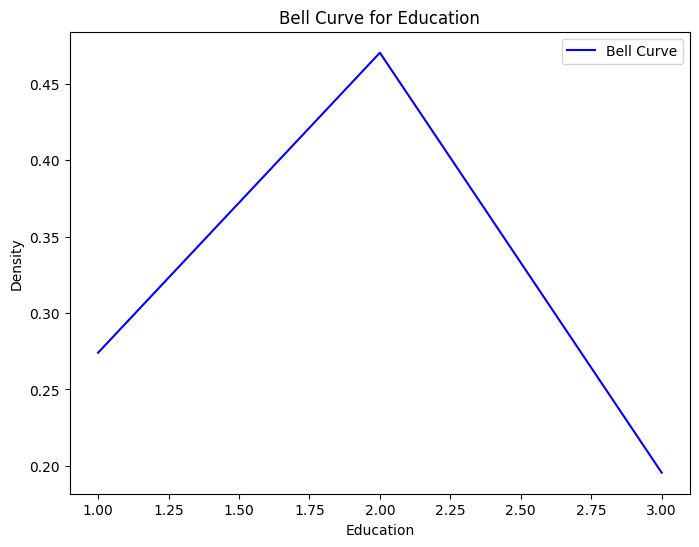

In [9]:
# Plot bell curves for Age, Income, and Education
plot_bell_curve('Age', df)
plot_bell_curve('Income', df)
plot_bell_curve('Education', df)

In [10]:
# Performance analysis
def performance_analysis(df, target):
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in df.iterrows():
        prediction = gaussian_naive_bayes_predict(['Age', 'Income', 'Education'], [i[1].Age, i[1].Income, i[1].Education], target, df)

        if prediction == 1:
            if i[1][target] == 1:
                TP += 1
            else:
                FP += 1
        else:
            if i[1][target] == 0:
                TN += 1
            else:
                FN += 1

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = (2 * precision * recall) / (precision + recall)

    return precision, recall, f1_score

precision, recall, f1_score = performance_analysis(df, 'Personal Loan')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)


Precision:  0.6376021798365122
Recall:  0.4875
F1 Score:  0.5525383707201889
